In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("countries.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    object 
 1   Region                          188 non-null    object 
 2   Population (millions)           188 non-null    float64
 3   HDI                             172 non-null    float64
 4   GDP per Capita                  173 non-null    object 
 5   Cropland Footprint              173 non-null    float64
 6   Grazing Footprint               173 non-null    float64
 7   Forest Footprint                173 non-null    float64
 8   Carbon Footprint                173 non-null    float64
 9   Fish Footprint                  173 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        173 non-null    float64
 12  Grazing Land                    173 

In [5]:
import pandas as pd
import numpy as np

def feature_engineering(df):
    df = df.copy()
    eps = 1e-9  # nolga bo‘linishdan saqlanish uchun
    
    # --- 1. Ma’lumotlarni tozalash ---
    # GDP per Capita ni tozalash (agar $, vergul bo‘lsa)
    df["GDP per Capita"] = df["GDP per Capita"].replace('[\$,]', '', regex=True).astype(float)
    
    # Population ni float formatga o‘tkazish (millionda berilgan)
    df["Population (millions)"] = df["Population (millions)"].astype(float)
    
    # HDI ni 0-1 oralig‘ida ekanligini tekshirib to‘ldirish
    df["HDI"] = df["HDI"].clip(0, 1)
    
    # Yo‘q qiymatlarni ustun medianasi bilan to‘ldirish
    df = df.fillna(df.median(numeric_only=True))
    
    # --- 2. Yangi xususiyatlar yaratish ---
    
    # Biocapacity Efficiency = Total Biocapacity / Total Ecological Footprint
    df["Biocapacity Efficiency"] = df["Total Biocapacity"] / (df["Total Ecological Footprint"] + eps)
    
    # Environmental Deficit Ratio = (Biocapacity Deficit or Reserve) / Total Biocapacity
    df["Environmental Deficit Ratio"] = df["Biocapacity Deficit or Reserve"] / (df["Total Biocapacity"] + eps)
    
    # Carbon Intensity = Carbon Footprint / GDP per Capita
    df["Carbon Intensity"] = df["Carbon Footprint"] / (df["GDP per Capita"] + eps)
    
    # Land Use Ratio = (Cropland + Grazing Land + Forest Land + Fishing Water + Urban Land) / Total Biocapacity
    df["Land Use Ratio"] = (
        df["Cropland"] + df["Grazing Land"] + df["Forest Land"] + 
        df["Fishing Water"] + df["Urban Land"]
    ) / (df["Total Biocapacity"] + eps)
    
    # Resource Pressure = Total Ecological Footprint / Population
    df["Resource Pressure"] = df["Total Ecological Footprint"] / (df["Population (millions)"] + eps)
    
    # Development Pressure = GDP per Capita * HDI
    df["Development Pressure"] = df["GDP per Capita"] * df["HDI"]
    
    # Sustainability Index = (Biocapacity Efficiency * HDI) / Earths Required
    df["Sustainability Index"] = (df["Biocapacity Efficiency"] * df["HDI"]) / (df["Earths Required"] + eps)
    
    # --- 3. Log-transformatsiya (ko‘p farqli qiymatlar uchun) ---
    log_cols = ["GDP per Capita", "Population (millions)", "Total Ecological Footprint", "Total Biocapacity"]
    for col in log_cols:
        df[f"log_{col}"] = np.log1p(df[col])
    
    # --- 4. Kategorik ustunlarni kodlash ---
    # Region va Data Quality ni one-hot encoding qilish
    df = pd.get_dummies(df, columns=["Region", "Data Quality"], drop_first=True)
    
    # --- 5. Foydasiz ustunlarni olib tashlash ---
    drop_cols = ["Country"]  # model uchun kerak emas
    df = df.drop(columns=drop_cols, errors='ignore')
    
    return df
# 1. Faylni yuklash
df = pd.read_csv("countries.csv")

# 2. Feature engineering funksiyasini qo‘llash
df_fe = feature_engineering(df)





In [7]:
df_fe.head()

,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,...,Region_Latin America,Region_Middle East/Central Asia,Region_North America,Region_Northern/Eastern Europe,Data Quality_3B,Data Quality_3L,Data Quality_3T,Data Quality_4,Data Quality_5,Data Quality_6
0,29.82,0.46,614.66,0.30,0.20,0.08,0.18,0.00,0.79,0.24,...,False,True,False,False,False,False,False,False,False,True
1,3.16,0.73,4534.37,0.78,0.22,0.25,0.87,0.02,2.21,0.55,...,False,False,False,True,False,False,False,False,False,True
2,38.48,0.73,5430.57,0.60,0.16,0.17,1.14,0.01,2.12,0.24,...,False,False,False,False,False,False,False,False,True,False
3,20.82,0.52,4665.91,0.33,0.15,0.12,0.20,0.09,0.93,0.20,...,False,False,False,False,False,False,False,False,False,True
4,0.09,0.78,13205.10,0.52,0.18,0.26,1.14,0.07,5.38,0.35,...,True,False,False,False,False,False,False,False,False,False


In [8]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Population (millions)            188 non-null    float64
 1   HDI                              188 non-null    float64
 2   GDP per Capita                   188 non-null    float64
 3   Cropland Footprint               188 non-null    float64
 4   Grazing Footprint                188 non-null    float64
 5   Forest Footprint                 188 non-null    float64
 6   Carbon Footprint                 188 non-null    float64
 7   Fish Footprint                   188 non-null    float64
 8   Total Ecological Footprint       188 non-null    float64
 9   Cropland                         188 non-null    float64
 10  Grazing Land                     188 non-null    float64
 11  Forest Land                      188 non-null    float64
 12  Fishing Water         

In [10]:
cols = df_fe.columns.tolist()
print(cols)

['Population (millions)', 'HDI', 'GDP per Capita', 'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint', 'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint', 'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water', 'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve', 'Earths Required', 'Countries Required', 'Biocapacity Efficiency', 'Environmental Deficit Ratio', 'Carbon Intensity', 'Land Use Ratio', 'Resource Pressure', 'Development Pressure', 'Sustainability Index', 'log_GDP per Capita', 'log_Population (millions)', 'log_Total Ecological Footprint', 'log_Total Biocapacity', 'Region_Asia-Pacific', 'Region_European Union', 'Region_Latin America', 'Region_Middle East/Central Asia', 'Region_North America', 'Region_Northern/Eastern Europe', 'Data Quality_3B', 'Data Quality_3L', 'Data Quality_3T', 'Data Quality_4', 'Data Quality_5', 'Data Quality_6']


| 🏷️ Ustun nomi                        | 💬 Batafsil izoh                                                                                                                                                                     | 🔢 Ma’lumot turi |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ---------------- |
| **Country** 🗺️                       | Tahlil qilinayotgan mamlakatning nomi. Bu ustun asosiy identifikator bo‘lib xizmat qiladi, ya’ni har bir satr aynan bir mamlakatga tegishli ma’lumotni bildiradi.                    | `object (str)`   |
| **Region** 🌐                         | Mamlakat joylashgan geografik mintaqa (masalan: Europe, Asia, Africa). Bu ustun mintaqaviy tahlillar yoki taqqoslashlarda foydalidir.                                                | `object (str)`   |
| **Population (millions)** 👥          | Mamlakat aholisi soni millionlarda ko‘rsatilgan. Bu qiymat iqtisodiy, ekologik yoki ijtimoiy ko‘rsatkichlarni aholi bilan solishtirishda ishlatiladi.                                | `float`          |
| **HDI** 📈                            | *Human Development Index* — Inson taraqqiyoti indeksi. U sog‘liq, ta’lim va daromad darajasiga asoslanib 0 dan 1 gacha baholanadi. Yuqori HDI = yuqori hayot sifati.                 | `float`          |
| **GDP per Capita** 💰                 | *Gross Domestic Product per Capita* — mamlakatda bir kishiga to‘g‘ri keladigan yalpi ichki mahsulot. Iqtisodiy rivojlanish darajasini ifodalaydi.                                    | `float`          |
| **Cropland Footprint** 🌾             | Qishloq xo‘jaligi mahsulotlarini ishlab chiqarish uchun kerak bo‘lgan yer maydoni (gha/odam). Yuqori qiymat — ko‘p resurs talab qiluvchi oziq-ovqat tizimidan darak beradi.          | `float`          |
| **Grazing Footprint** 🐄              | Chorvachilik (sigir, qo‘y, ot va h.k.) uchun ajratilgan yaylov yerlari tomonidan yaratilgan ekologik bosim. Bu ustun go‘sht iste’moli bilan chambarchas bog‘liq.                     | `float`          |
| **Forest Footprint** 🌲               | O‘rmonlardan olinadigan resurslar (yog‘och, qog‘oz va h.k.) uchun kerak bo‘lgan maydon. Yuqori qiymat o‘rmon resurslariga katta talabni bildiradi.                                   | `float`          |
| **Carbon Footprint** 🌫️              | Issiqxona gazlari, ayniqsa CO₂ chiqindilari bilan bog‘liq ekologik iz. Bu energiya iste’moli va transportdan chiqadigan chiqindilarni o‘lchaydi.                                     | `float`          |
| **Fish Footprint** 🐟                 | Baliqchilik va dengiz mahsulotlarining iste’moli natijasida suv resurslariga tushadigan yuklama. Bu ko‘rsatkich dengiz ekologiyasi uchun muhim.                                      | `float`          |
| **Total Ecological Footprint** 🌍     | Yuqoridagi barcha ekologik iz turlarining yig‘indisi. Mamlakatning Yer resurslaridan foydalanish darajasini ko‘rsatadi.                                                              | `float`          |
| **Cropland** 🌾                       | Mamlakatdagi mavjud qishloq xo‘jaligi yerlarining ekologik sig‘imi (ya’ni ularning qayta tiklana olish quvvati).                                                                     | `float`          |
| **Grazing Land** 🐑                   | Yaylov yerlari orqali qayta tiklanadigan tabiiy resurslar miqdori. Bu biokapasitet hayvonot mahsulotlari ishlab chiqarish salohiyatini bildiradi.                                    | `float`          |
| **Forest Land** 🌳                    | O‘rmon hududlarining ekologik sig‘imi, ya’ni o‘rmonlar qancha resursni barqaror tarzda ta’minlay olishi.                                                                             | `float`          |
| **Fishing Water** 🌊                  | Suv ekotizimlarining biokapasiteti — ya’ni dengiz va daryo suvlarining baliqchilik faoliyatini qo‘llab-quvvatlash salohiyati.                                                        | `float`          |
| **Urban Land** 🏙️                    | Shahar hududlarining egallagan maydoni. Bu ustun urbanizatsiya darajasini va tabiiy yerlarga bosimni ko‘rsatadi.                                                                     | `float`          |
| **Total Biocapacity** 🌱              | Mamlakatdagi barcha tabiiy resurslar (yer, suv, o‘rmon, yaylov va h.k.) ning umumiy ekologik sig‘imi. Bu — mamlakat tabiiy resurslardan barqaror foydalanish imkoniyatini bildiradi. | `float`          |
| **Biocapacity Deficit or Reserve** ⚖️ | Mamlakatning ekologik balansi: agar manfiy bo‘lsa, mamlakat tabiiy resurslardan ortiqcha foydalanmoqda; musbat bo‘lsa — resurs zaxirasi mavjud.                                      | `float`          |
| **Earths Required** 🌎                | Agar butun insoniyat shu mamlakatdagi odamlar kabi yashasa, Yer sayyorasining necha baravari kerak bo‘ladi — ekologik bosim o‘lchovi.                                                | `float`          |
| **Countries Required** 🧭             | Shu mamlakatning iste’mol darajasini qo‘llab-quvvatlash uchun nechta mamlakat miqdoridagi resurslar kerakligini bildiradi.                                                           | `float`          |
| **Data Quality** ✅                    | Ma’lumotlarning aniqligi va ishonchliligi darajasi. “High”, “Medium”, yoki “Low” kabi qiymatlar oladi.                                                                               | `object (str)`   |


In [11]:
import sys
import os

In [12]:
sys.path.append(os.path.abspath("../Source"))

In [13]:
import sys
print(sys.executable)

C:\Users\IT-PARK\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [17]:
from Classes import Cleaner, Encoder, Scaler

In [18]:
cleaner = Cleaner(df)
df = cleaner.tozala().get_df()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    object 
 1   Region                          188 non-null    object 
 2   Population (millions)           188 non-null    float64
 3   HDI                             188 non-null    float64
 4   GDP per Capita                  188 non-null    object 
 5   Cropland Footprint              188 non-null    float64
 6   Grazing Footprint               188 non-null    float64
 7   Forest Footprint                188 non-null    float64
 8   Carbon Footprint                188 non-null    float64
 9   Fish Footprint                  188 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        188 non-null    float64
 12  Grazing Land                    188 

In [20]:
encoder = Encoder(df)
df = encoder.encodla().get_df()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    int64  
 1   Region                          188 non-null    int64  
 2   Population (millions)           188 non-null    float64
 3   HDI                             188 non-null    float64
 4   GDP per Capita                  188 non-null    int64  
 5   Cropland Footprint              188 non-null    float64
 6   Grazing Footprint               188 non-null    float64
 7   Forest Footprint                188 non-null    float64
 8   Carbon Footprint                188 non-null    float64
 9   Fish Footprint                  188 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        188 non-null    float64
 12  Grazing Land                    188 

In [22]:
scaler = Scaler(df)
df = scaler.scaling_qil().get_df()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    float64
 1   Region                          188 non-null    float64
 2   Population (millions)           188 non-null    float64
 3   HDI                             188 non-null    float64
 4   GDP per Capita                  188 non-null    float64
 5   Cropland Footprint              188 non-null    float64
 6   Grazing Footprint               188 non-null    float64
 7   Forest Footprint                188 non-null    float64
 8   Carbon Footprint                188 non-null    float64
 9   Fish Footprint                  188 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        188 non-null    float64
 12  Grazing Land                    188 

In [24]:
df

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,-1.722862,1.113141,29.82,0.46000,1.123674,0.300000,0.200000,0.080000,0.180000,0.000000,...,0.24000,0.20000,0.020000,0.000000,0.04000,0.50,-0.30,0.46,1.60,0.924437
1,-1.704436,2.241284,3.16,0.73000,0.185116,0.780000,0.220000,0.250000,0.870000,0.020000,...,0.55000,0.21000,0.290000,0.070000,0.06000,1.18,-1.03,1.27,1.87,0.924437
2,-1.686009,-1.143145,38.48,0.73000,0.691937,0.600000,0.160000,0.170000,1.140000,0.010000,...,0.24000,0.27000,0.030000,0.010000,0.03000,0.59,-1.53,1.22,3.61,0.419222
3,-1.667583,-1.143145,20.82,0.52000,0.241429,0.330000,0.150000,0.120000,0.200000,0.090000,...,0.20000,1.42000,0.640000,0.260000,0.04000,2.55,1.61,0.54,0.37,0.924437
4,-1.649157,0.549069,0.09,0.78000,-0.866070,0.578208,0.263179,0.373815,1.804913,0.122486,...,0.53185,0.45659,2.459191,0.595145,0.06711,0.94,-4.44,3.11,5.70,-2.106857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1.649157,-0.579073,90.80,0.66000,-1.203950,0.500000,0.010000,0.190000,0.790000,0.050000,...,0.55000,0.01000,0.170000,0.160000,0.10000,1.00,-0.65,0.95,1.66,0.924437
184,1.667583,-0.579073,0.01,0.68636,-1.485518,0.578208,0.263179,0.373815,1.804913,0.122486,...,0.53185,0.45659,2.459191,0.595145,0.06711,1.51,-0.56,1.19,1.37,-0.591210
185,1.686009,1.113141,23.85,0.50000,-1.316577,0.340000,0.140000,0.040000,0.420000,0.040000,...,0.09000,0.12000,0.040000,0.200000,0.04000,0.50,-0.53,0.59,2.06,0.419222
186,1.704436,-1.143145,14.08,0.58000,-1.110095,0.190000,0.180000,0.330000,0.240000,0.010000,...,0.24000,0.94000,0.990000,0.020000,0.04000,2.23,1.24,0.57,0.44,0.924437


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    float64
 1   Region                          188 non-null    float64
 2   Population (millions)           188 non-null    float64
 3   HDI                             188 non-null    float64
 4   GDP per Capita                  188 non-null    float64
 5   Cropland Footprint              188 non-null    float64
 6   Grazing Footprint               188 non-null    float64
 7   Forest Footprint                188 non-null    float64
 8   Carbon Footprint                188 non-null    float64
 9   Fish Footprint                  188 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        188 non-null    float64
 12  Grazing Land                    188 

In [27]:
df.to_csv(r"C:\Users\IT-PARK\Desktop\29-dars\Data\Data_preprosessed.csv", index=False)

In [28]:
df = pd.read_csv(r"C:\Users\IT-PARK\Desktop\29-dars\Data\Data_preprosessed.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    float64
 1   Region                          188 non-null    float64
 2   Population (millions)           188 non-null    float64
 3   HDI                             188 non-null    float64
 4   GDP per Capita                  188 non-null    float64
 5   Cropland Footprint              188 non-null    float64
 6   Grazing Footprint               188 non-null    float64
 7   Forest Footprint                188 non-null    float64
 8   Carbon Footprint                188 non-null    float64
 9   Fish Footprint                  188 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        188 non-null    float64
 12  Grazing Land                    188 

Data Quality ustuni bilan boshqa ustunlar o'rtasidagi korrelyatsiya:

                                Data Quality
Data Quality                        1.000000
Population (millions)               0.188479
GDP per Capita                      0.155851
Cropland                            0.128828
Cropland Footprint                  0.117032
Urban Land                          0.091588
Country                            -0.010052
Forest Footprint                   -0.014605
HDI                                -0.014833
Region                             -0.016448
Countries Required                 -0.022199
Biocapacity Deficit or Reserve     -0.090276
Carbon Footprint                   -0.091184
Forest Land                        -0.120974
Total Biocapacity                  -0.124187
Earths Required                    -0.163787
Total Ecological Footprint         -0.164110
Grazing Footprint                  -0.170987
Grazing Land                       -0.188684
Fish Footprint                

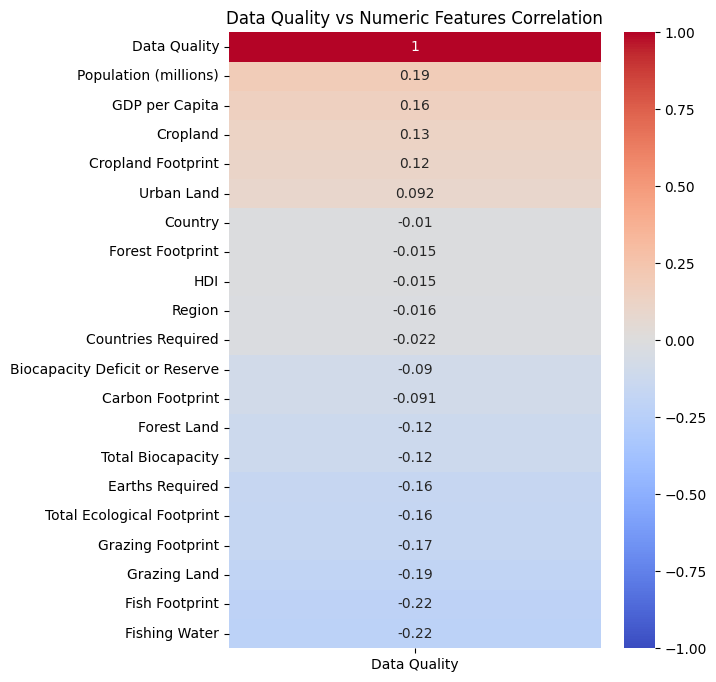

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Quality ustuni numeric ekanligiga ishonch hosil qiling
df['Data Quality'] = pd.to_numeric(df['Data Quality'], errors='coerce')

# 2. Numeric ustunlarni tanlash (Data Quality ustuni bilan birga)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 3. Data Quality ustuni bilan qolgan numeric ustunlar o'rtasidagi korrelyatsiya
corr = df[numeric_cols].corr()

# 4. Data Quality ustuni atrofidagi korrelyatsiyalarni olamiz
target_corr = corr[['Data Quality']].sort_values(by='Data Quality', ascending=False)

print("Data Quality ustuni bilan boshqa ustunlar o'rtasidagi korrelyatsiya:\n")
print(target_corr)

# 5. Heatmap chizish uchun korrelyatsiya matritsasini tanlaymiz
plt.figure(figsize=(6,8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Data Quality vs Numeric Features Correlation')
plt.show()


# Feature Selection -- Ustunlarni tanlab olish 

# Filtering -- filterlab olish 

# 2 turi bor 
# 1-highly correlated -- yuqori bog`liqlik
# 2-low impact - kam tasir qilayotganlik 

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Korrelyatsiya jadvali
corr = X.corrwith(pd.Series(y))
selected_features = corr[abs(corr) > 0.3].index.tolist()
print("Tanlangan xususiyatlar:", selected_features)


Tanlangan xususiyatlar: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


# Wrapper Methods (O‘rab olish usuli)

# Modelni yaratib, har xil xususiyatlar kombinatsiyasini sinovdan o‘tkazadi va eng yaxshi natija beradiganlarini tanlaydi. 

Mashhur metodlar:

Forward Selection

Backward Elimination

Recursive Feature Elimination (RFE)

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Model
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("Tanlangan xususiyatlar:", selected_features)


C:\Users\IT-PARK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IT-PARK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increa

Tanlangan xususiyatlar: Index(['mean radius', 'texture error', 'worst radius', 'worst compactness',
       'worst concavity'],
      dtype='object')


# Embedded Methods

# Model o‘rganish vaqtida xususiyatlarning ahamiyatini baholaydi va tanlaydi. Filter va wrapper metodlarining kombinatsiyasi sifatida qaraladi.

Mashhur metodlar:

Lasso Regression (L1 penalty)

Tree-based models (Random Forest, XGBoost)

In [34]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

model = SelectFromModel(lasso, prefit=True)
selected_features = X.columns[model.get_support()]
print("Tanlangan xususiyatlar:", selected_features)


Tanlangan xususiyatlar: Index(['mean texture', 'mean area', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst concavity'],
      dtype='object')


| Method   | Tezlik   | Overfitting xavfi | Modelga bog‘liqligi |
| -------- | -------- | ----------------- | ------------------- |
| Filter   | Juda tez | Past              | Yo‘q                |
| Wrapper  | Sekin    | Yuqori            | Ha                  |
| Embedded | O‘rtacha | O‘rtacha          | Ha                  |
